### Test on ECG Data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).

Try to design and train your MLP to classify normal and abnormal ECG samples.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()


0         1         2         3    ...       137       138       139  140
0 -0.112522 -2.827204 -3.773897 -4.349751  ...  0.123431  0.925286  0.193137  1.0
1 -1.100878 -3.996840 -4.285843 -4.506579  ...  0.773820  1.119621 -1.436250  1.0
2 -0.567088 -2.593450 -3.874230 -4.584095  ...  0.321097  0.904227 -0.421797  1.0
3  0.490473 -1.914407 -3.616364 -4.318823  ...  1.086798  1.403011 -0.383564  1.0
4  0.800232 -0.874252 -2.384761 -3.973292  ...  0.971020  1.614392  1.421456  1.0

[5 rows x 141 columns]

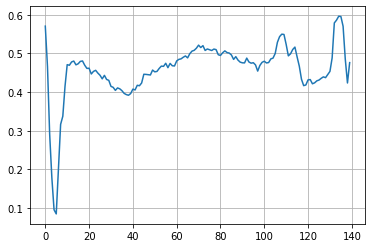

In [2]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)

# Normalize to [0, 1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

# plot data
plt.grid()
plt.plot(np.arange(140), train_data[0])
plt.show()

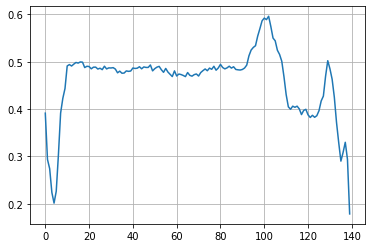

In [3]:
plt.grid()
plt.plot(np.arange(140), train_data[100])
plt.show()